In [1]:
# Load model directly
from transformers import AutoModel, DebertaV2Tokenizer, AutoTokenizer
import torch
import numpy as np
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
model = AutoModel.from_pretrained("microsoft/deberta-v3-large")

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [3]:
testString = "Test Input"
tokenized = tokenizer(testString, return_tensors='pt')
tokenized.input_ids.shape
tokenized.input_ids

tensor([[    1,  4432, 21863,     2]])

In [4]:
id_vocab = {v:k for k,v in tokenizer.vocab.items()}
all_vocab_indices = list(id_vocab.keys())

In [ ]:
all_vocab_str = []
for i in range(len(id_vocab)):
    all_vocab_str.append(id_vocab[i])

In [8]:
embeddings_dict = {}
embeddings = []
for i in range(len(id_vocab)):
    out1 = model.embeddings.word_embeddings(torch.tensor([i]).unsqueeze(0)).detach()
    tok_emb = model.embeddings.LayerNorm(out1)
    embeddings_dict[id_vocab[i]] = i
    embeddings.append(torch.squeeze(tok_emb.detach()))
embeddings = torch.vstack(embeddings)

In [8]:
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

In [171]:
reducer = UMAP(n_neighbors=15, n_components=64, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings64 = reducer.fit_transform(embeddings_scaled)
embeddings64.shape

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_components=64, random_state=42, verbose=True)
Sun Nov 17 00:44:12 2024 Construct fuzzy simplicial set
Sun Nov 17 00:44:12 2024 Finding Nearest Neighbors
Sun Nov 17 00:44:12 2024 Building RP forest with 23 trees
Sun Nov 17 00:44:28 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	Stopping threshold met -- exiting after 16 iterations
Sun Nov 17 00:45:27 2024 Finished Nearest Neighbor Search
Sun Nov 17 00:45:34 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Nov 17 00:55:26 2024 Finished embedding


(128001, 64)

In [177]:
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'wb') as f:
    np.save(f, embeddings64, False)

In [8]:
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'rb') as f:
    embeddings64 = torch.tensor(np.load(f, allow_pickle=False))
embeddings64.shape

torch.Size([128001, 64])

In [9]:
reducer = UMAP(n_neighbors=15, n_components=128, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings128 = reducer.fit_transform(embeddings_scaled)
embeddings128.shape

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_components=128, random_state=42, verbose=True)
Sun Nov 17 01:59:01 2024 Construct fuzzy simplicial set
Sun Nov 17 01:59:04 2024 Finding Nearest Neighbors
Sun Nov 17 01:59:04 2024 Building RP forest with 23 trees
Sun Nov 17 01:59:42 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	Stopping threshold met -- exiting after 16 iterations
Sun Nov 17 02:03:08 2024 Finished Nearest Neighbor Search
Sun Nov 17 02:04:15 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Nov 17 02:40:14 2024 Finished embedding


(128001, 128)

In [18]:
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128.npy', 'wb') as f:
    np.save(f, embeddings128, False)

In [15]:
with open(r'data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128.npy', 'rb') as f:
    embeddings128 = torch.tensor(np.load(f, allow_pickle=False))
embeddings128.shape

torch.Size([128001, 128])

In [12]:
extra_tokens = {
    'g': ['good', 'bad', 'nice', 'evil', 'pleasant', 'awful', 'love', 'wicked'],
    'b': ['king', 'queen', 'prince', 'princess', 'crown', 'sovereign', 'duke'],
    'y': ['car', 'traffic', 'bicycle', 'bus', 'train', 'truck', 'motorcycle', 'lane', 'highway'],
    'r': ['basketball', 'ball', 'soccer', 'tennis', 'cricket', 'football', 'golf', 'baseball']
}

target_tokens = []
color_codes = []
for color, tokens in extra_tokens.items():
    for token in tokens:
        target_tokens.append(token)
        color_codes.append(color)

idx = [tokenizer.vocab[t] for t in target_tokens]

In [13]:
all_vocab = [id_vocab[i] for i in range(len(tokenizer.vocab))]

In [16]:
embeddings[idx]
embeddings64[idx]
embeddings128[idx]
target_vocab = [all_vocab[i] for i in idx]

In [10]:
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, n_iter=300, metric='cosine')

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


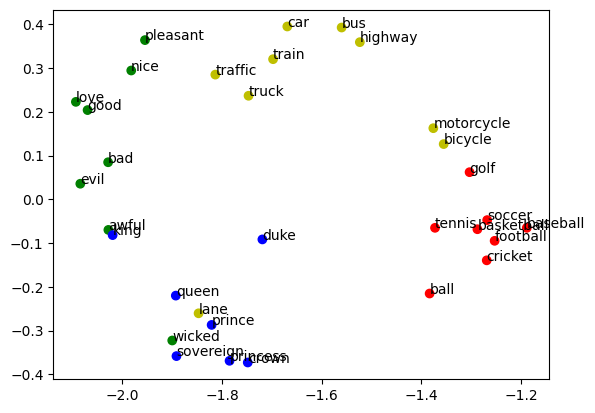

In [188]:
X_tsne = tsne.fit_transform(embeddings[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


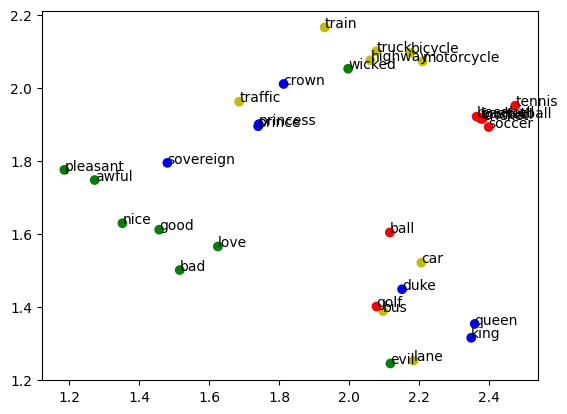

In [17]:
X_tsne = tsne.fit_transform(embeddings128[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


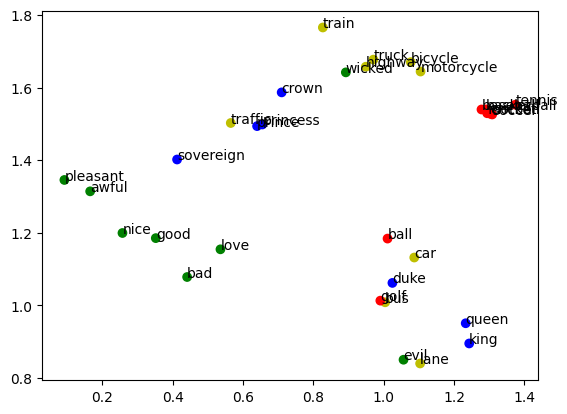

In [176]:
X_tsne = tsne.fit_transform(embeddings64[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()